In [133]:
import pandas as pd
import numpy as np

Выгрузка и объединение

In [34]:
df_text = pd.read_csv(r'C:\pythonings\funstuff\text.csv')
df_text =  df_text.fillna('na')
df_text

,WORDNO,WORD
0,1,katekizmas
1,2,arba
2,3,mokslas
3,4,kiekvienam
4,5,krikščioniui
...,...,...
16575,16576,amžių
16576,16577,amžinų
16577,16578,","
16578,16579,amen


In [35]:
df_vocab = pd.read_csv(r'C:\pythonings\funstuff\vocab.csv')
df_vocab =  df_vocab.fillna('na')
df_vocab

,WORD,POS
0,***,***
1,",",-
2,-,-
3,.,-
4,?,-
...,...,...
3963,žymę,na
3964,žyminame,V
3965,žynauja,V
3966,žyvate,na


In [58]:
df_merged = pd.merge(df_text, df_vocab,how = 'inner',  on = 'WORD')
df_merged

,WORDNO,WORD,POS
0,1,katekizmas,na
1,2,arba,KO
2,678,arba,KO
3,702,arba,KO
4,837,arba,KO
...,...,...,...
19417,16543,pataisyti,V
19418,16552,pildymo,na
19419,16556,atitraukti,V
19420,16562,didėsės?didesnės?,na


Чистосердечная попытка сделать задание со звездочкой

In [93]:
spisok = dict.fromkeys(['WORDNO','WORD', 'POS'])

wordno = []
word = []
pos = []

In [95]:
for i in range(1, len(df_merged.index)):
    if df_merged['POS'][i] == df_merged['POS'][i-1]:
        wordno.append(i)
        word.append(df_merged['WORD'][i])
        pos.append(df_merged['POS'][i])

In [98]:
spisok['WORDNO'] = wordno
spisok['WORD'] = word
spisok['POS'] = pos

In [99]:
spisok

{'WORDNO': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  64,
  65,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,

In [219]:
new_df = pd.DataFrame(spisok)
new_df

,WORDNO,WORD,POS
0,2,arba,KO
1,3,arba,KO
2,4,arba,KO
3,5,arba,KO
4,6,arba,KO
...,...,...,...
11765,19409,teiksiesi,V
11766,19413,užsilaikyk,V
11767,19416,pramitinsi,V
11768,19417,pataisyti,V


Скользящее среднее

In [221]:
rolling_list = []

for i in df_merged.groupby('POS'):
    
    rolling_list.append([k for k in pd.Series([len(j) for j in i[1]["WORD"]]).rolling(window = 10).mean().tail(20)])

# for i in rolling_list:
#     print(i)

[1.5, 1.6, 1.7, 1.7, 1.7, 2.0, 2.2, 2.1, 2.0, 1.9, 1.8, 1.7, 1.6, 1.6, 1.6, 1.3, 1.0, 1.0, 1.0, 1.2]
[4.4, 4.6, 4.5, 4.4, 4.5, 4.8, 4.7, 4.4, 4.2, 4.0, 4.0, 3.8, 3.6, 3.4, 3.3, 3.0, 3.4, 3.5, 3.9, 3.9]
[nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[nan, nan, nan, nan, nan]
[nan, nan, nan]
[nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan, nan, nan]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[nan]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[nan]
[nan, nan]
[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0]
[nan, nan, nan, nan, nan, nan

In [223]:
#дф с скользящими средними по ЧР
roll = pd.DataFrame(rolling_list, index = [i[0] for i in df_merged.groupby('POS')])
roll

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
***,1.5,1.6,1.7,1.7,1.7,2.0,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.6,1.6,1.3,1.0,1.0,1.0,1.2
-,4.4,4.6,4.5,4.4,4.5,4.8,4.7,4.4,4.2,4.0,4.0,3.8,3.6,3.4,3.3,3.0,3.4,3.5,3.9,3.9
1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


График

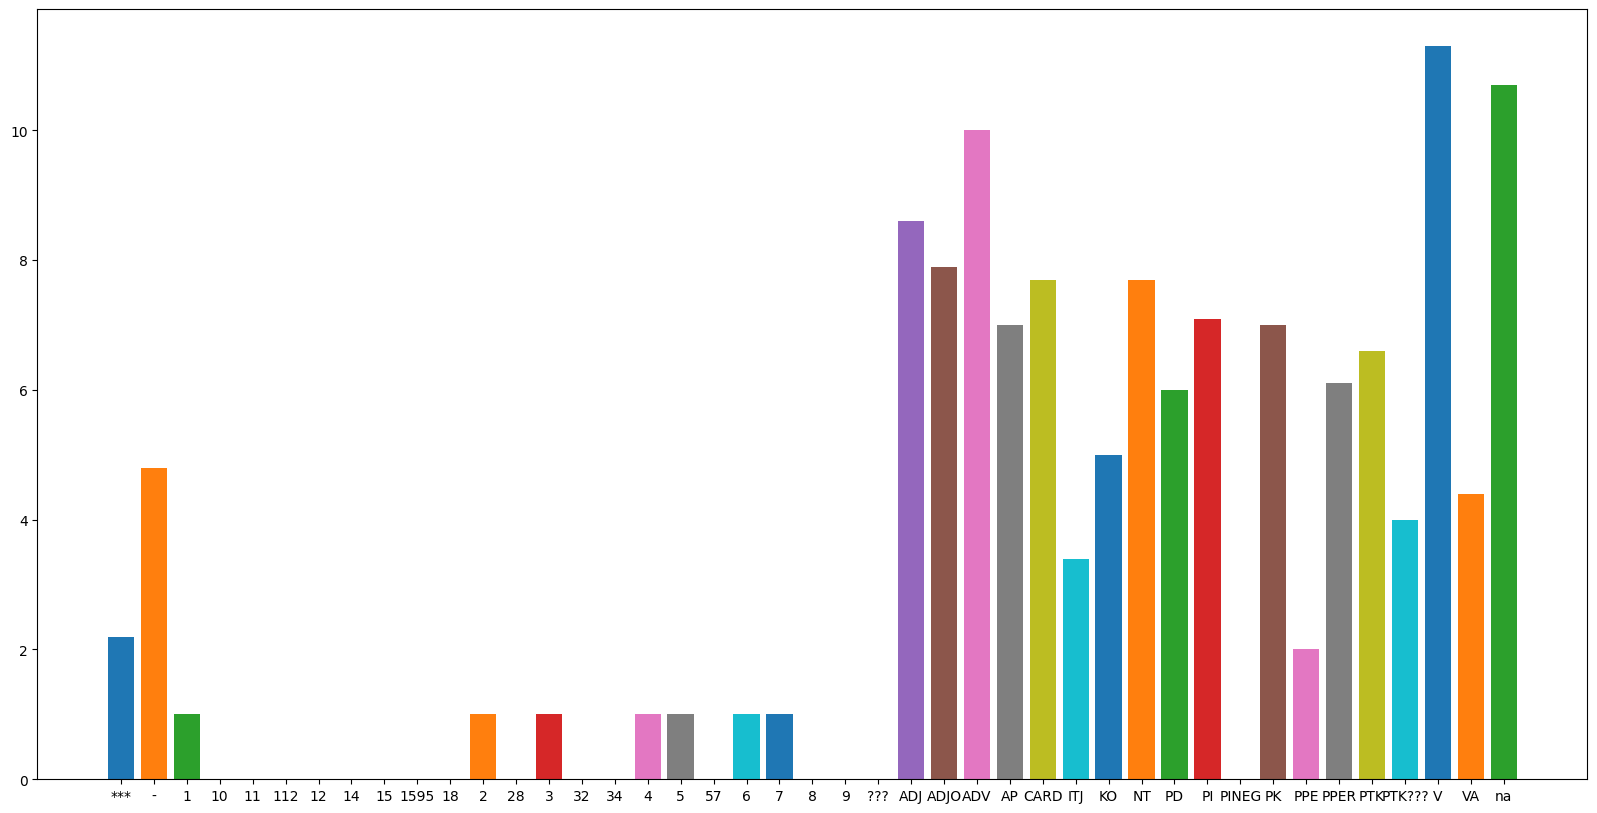

In [228]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(20, 10))

for i in roll.T:
    plt.bar(i, roll.loc[i])

plt.savefig('graph_rolling_length.jpg')

plt.show()


In [226]:
#таблица будет выглядеть устрашающе из-за большого количества нанов, но правду она, кажется, отражает

roll.to_html('rolling_mean_df.html', header=None)